In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Quantile_Lorentzian as Q_Lorentzian
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
from pprint import pprint

In [ ]:
import TO_sim.Get_2ndR_NORM as GN
get_r_rp = GN.get_r_rp


In [75]:
import importlib

import TO_sim.Get_2ndR_NORM as GN
importlib.reload(GN)
get_r_rp = GN.get_r_rp

In [125]:
import importlib

import TO_sim.Get_2ndR_Lorentzian as GL
importlib.reload(GL)
get_r_rL = GN.get_r_rp

In [7]:
from TO_sim.Get_2ndR_NORM import get_r_rp
from TO_sim.Get_2ndR_Lorentzian import get_r_rp as get_r_rL
from multiprocessing import pool
from parfor import parfor

In [151]:
seed =11
N = 10000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 4.31
dt = 0.1
t = np.arange(0,5000,dt)
K = 6.4
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=theta_random,p_omega=omega)
# plt.plot(np.sort(avg_dtheta[-1]))
# plt.plot((avg_dtheta[-1]))

In [ ]:
Ms_F = {}

In [ ]:
np.max()

In [ ]:
ms = np.arange(0,10.05,0.05)
# ms = np.arange(3.7,4,0.01)
# len(ms)

In [43]:
len(np.arange(0,32,0.02))

1600

In [82]:
np.linspace(0,33,1651)

array([0.000e+00, 2.000e-02, 4.000e-02, ..., 3.296e+01, 3.298e+01,
       3.300e+01])

In [83]:
m =10

In [84]:
F_rN = get_r_rp(m,0,K_max=33,K_len=1651)

/Users/gugyoungkim/Desktop/Kuramoto/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:157: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_d,err = quad(integrand_Rd2, omega_p,np.inf,args=(X,O_pm,shift_O,m),limit=200)
/Users/gugyoungkim/Desktop/Kuramoto/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:158: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  F_l = I_l/X
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in F_sec (vectorized)
  outputs = ufunc(*inputs)


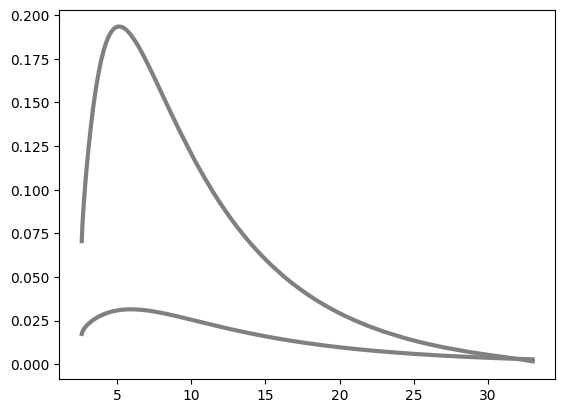

In [85]:
K_ = np.linspace(0,33,5000)
plt.plot(K_,(F_rN['R0_u'](K_)-F_rN['R_u'](K_))/2,color='gray',ls='-',lw=3)
plt.plot(F_rN['Ks'],F_rN['r_+u'],color='gray',ls='-',lw=3)
plt.plot(F_rN['Ks'],F_rN['r_+d'],color='gray',ls='-',lw=3)

In [ ]:
list(ms)[-10]

9.59999999999998

In [ ]:
ms = np.arange(0,10.05,0.05)

Ms_F = {}
for m in tqdm(ms):
    Ms_F[m] = get_r_rp(m,0,K_max=33,K_len=1651)


  0%|          | 0/50 [00:00<?, ?it/s]

In [59]:
K_ = np.linspace(0,32,5000)

In [88]:
ms = list(Ms_F.keys())

In [105]:
np.searchsorted(ms,7.6)

103

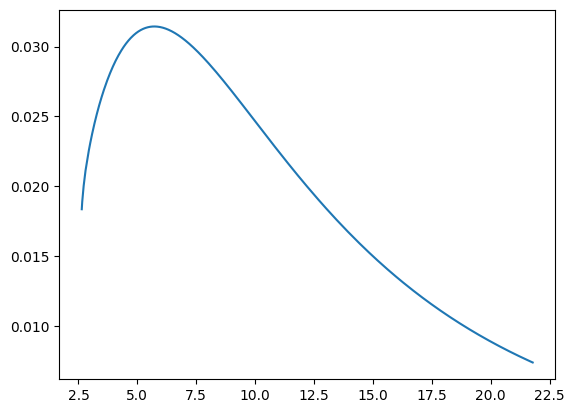

In [60]:
plt.plot(Ks,(F_rN['R0_u'](Ks)-F_rN['R_u'](Ks))/2)

In [115]:
ms = np.r_[ms[:103],ms[-50:]]

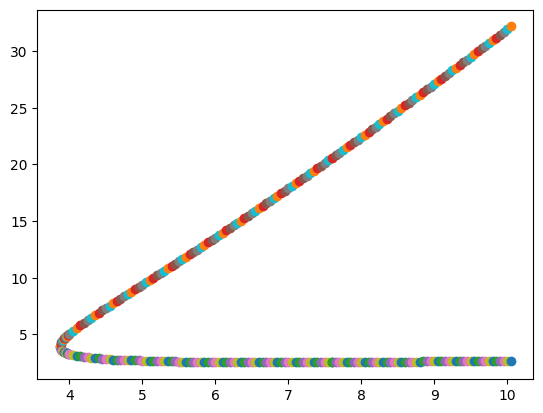

In [116]:
mc_l = []
mc_kl = []
Ms_FNew =  []
mc_u = []
mc_ku = []
for m in np.r_[ms[:103],ms[-50:]]:
    F_rN = Ms_F[m]
    Ms_FNew = Ms_F[m]
    Ks = F_rN['Ks']
    r_drift_2 = (F_rN['R0_u'](Ks)-F_rN['R_u'](Ks))/2
    rp = F_rN['r_+u']
    a, = np.where(r_drift_2<rp)
    if len(a)>2:
        mc_l.append(m)
        mc_kl.append(Ks[a[0]])
        mc_u.append(m)
        mc_ku.append(Ks[a[-1]])
        plt.scatter(m,Ks[a[0]])
        plt.scatter(m,Ks[a[-1]])
    if len(a)==1:
        mc_l.append(m)
        mc_kl.append(Ks[a[0]])
        plt.scatter(m,Ks[a[0]])

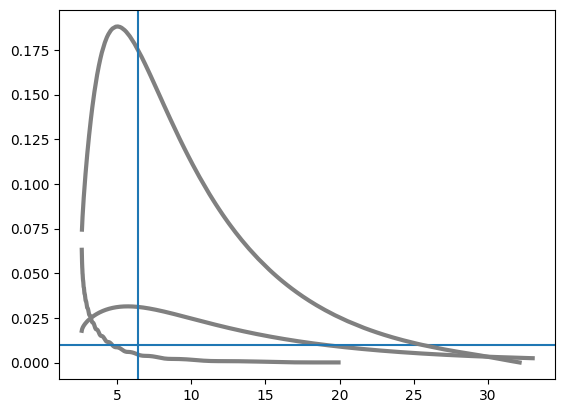

In [122]:
F_rN = Ms_F[list(ms)[-10]]
plt.plot(K_,(F_rN['R0_u'](K_)-F_rN['R_u'](K_))/2,color='gray',ls='-',lw=3)
plt.plot(K_,(F_rN['R_d'](K_)),color='gray',ls='-',lw=3)
plt.axhline(np.sqrt(1/10000))
plt.plot(F_rN['Ks'],F_rN['r_+u'],color='gray',ls='-',lw=3)
plt.plot(F_rN['Ks'],F_rN['r_+d'],color='gray',ls='-',lw=3)
plt.axvline(6.4)
# plt.plot(K_,F_rN['R_d'](K_),color='gray',ls='-',lw=3)

In [ ]:
np.savez('mc_Normal',mc_Kd=mc_kl,mc_Ku=mc_ku,mc_d=mc_l,mc_u=mc_u)
np.savez('R_Normal',ms=ms,Ms_F=Ms_F)

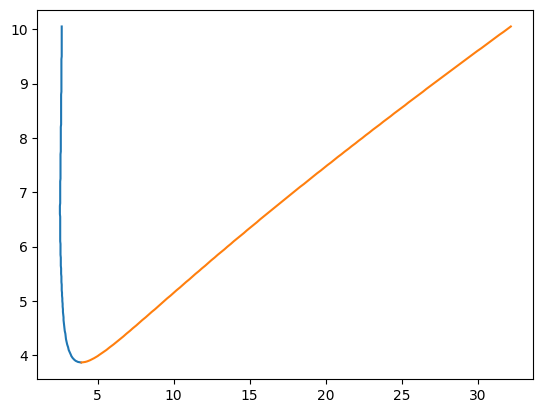

In [120]:
plt.plot(mc_kl,mc_l)
plt.plot(mc_ku,mc_u)
# plt.axhline(7.6)

In [ ]:
K_ = np.linspace(0,15,5000)
Ks = np.arange(0,10.05,0.1)


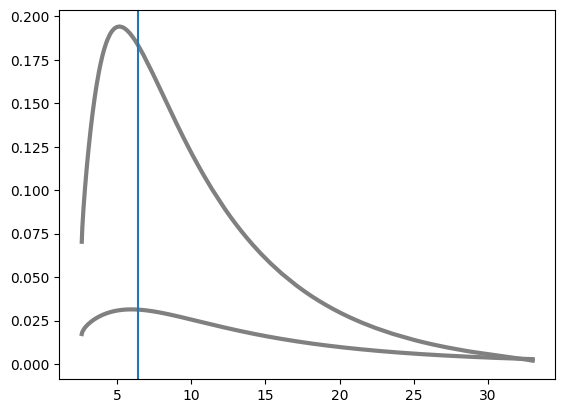

In [117]:
plt.plot(K_,(F_rN['R0_u'](K_)-F_rN['R_u'](K_))/2,color='gray',ls='-',lw=3)
plt.plot(F_rN['Ks'],F_rN['r_+u'],color='gray',ls='-',lw=3)
plt.plot(F_rN['Ks'],F_rN['r_+d'],color='gray',ls='-',lw=3)
plt.axvline(6.4)
# plt.plot(K_,F_rN['R_d'](K_),color='gray',ls='-',lw=3)

(-200.0, 200.0)

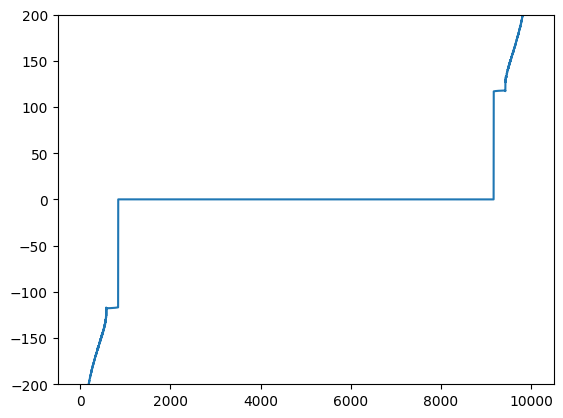

In [152]:
plt.plot(theta[-1]-theta[-1000]);
plt.ylim(-200,200)

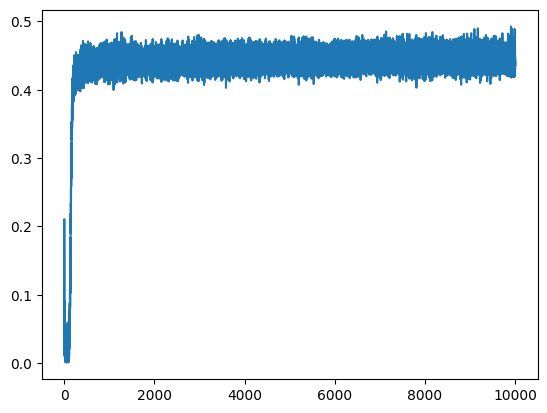

In [75]:
plt.plot(t,rs)

# Lorentzian

In [139]:
ms1 = np.arange(3.85,4,0.01)
ms2 = np.arange(4,10.05,0.05)
ms = np.r_[ms1,ms2]

Ms_F = {}
for m in tqdm(ms):
    Ms_F[m] = get_r_rL(m,0,K_max=34,K_len=1701)
    # Ms_F[m] = get_r_rL(m,0,K_max=33,K_len=301)


  0%|          | 0/137 [00:00<?, ?it/s]

/Users/gugyoungkim/Desktop/Kuramoto/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:157: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_d,err = quad(integrand_Rd2, omega_p,np.inf,args=(X,O_pm,shift_O,m),limit=200)
/Users/gugyoungkim/Desktop/Kuramoto/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:158: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  F_l = I_l/X
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in F_sec (vectorized)
  outputs = ufunc(*inputs)


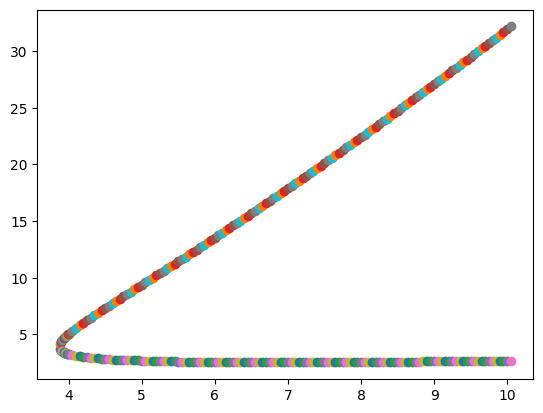

In [140]:
mc_l = []
mc_kl = []
Ms_FNew =  []
mc_u = []
mc_ku = []
for m in ms:
    F_rN = Ms_F[m]
    Ms_FNew = Ms_F[m]
    Ks = F_rN['Ks']
    r_drift_2 = (F_rN['R0_u'](Ks)-F_rN['R_u'](Ks))/2
    rp = F_rN['r_+u']
    a, = np.where(r_drift_2<rp)
    if len(a)>2:
        mc_l.append(m)
        mc_kl.append(Ks[a[0]])
        mc_u.append(m)
        mc_ku.append(Ks[a[-1]])
        plt.scatter(m,Ks[a[0]])
        plt.scatter(m,Ks[a[-1]])
    if len(a)==1:
        mc_l.append(m)
        mc_kl.append(Ks[a[0]])
        plt.scatter(m,Ks[a[0]])

In [141]:
np.savez('mc_Lorentzian',mc_Kd=mc_kl,mc_Ku=mc_ku,mc_d=mc_l,mc_u=mc_u)
np.savez('R_Lorentzian',ms=ms,Ms_F=Ms_F)

In [136]:
m = 3.85
F_rN = get_r_rp(m,0,K_max=33,K_len=1651)

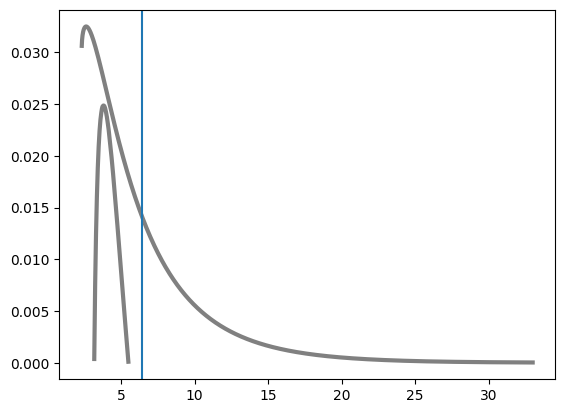

In [138]:
plt.plot(K_,(F_rN['R0_u'](K_)-F_rN['R_u'](K_))/2,color='gray',ls='-',lw=3)
plt.plot(F_rN['Ks'],F_rN['r_+u'],color='gray',ls='-',lw=3)
plt.plot(F_rN['Ks'],F_rN['r_+d'],color='gray',ls='-',lw=3)
plt.axvline(6.4)
# plt.plot(K_,F_rN['R_d'](K_),color='gray',ls='-',lw=3)

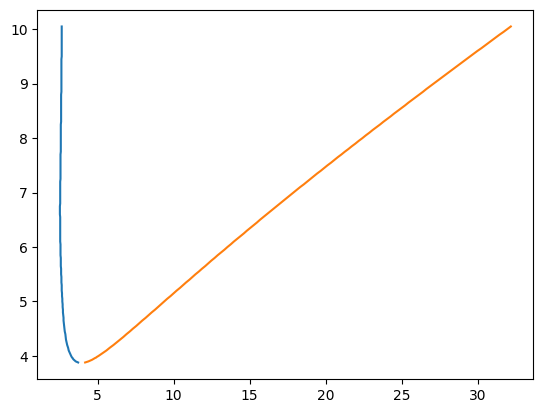

In [142]:
plt.plot(mc_kl,mc_l)
plt.plot(mc_ku,mc_u)
# plt.axhline(7.6)